In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/heartbeat/ptbdb_abnormal.csv
/kaggle/input/heartbeat/ptbdb_normal.csv
/kaggle/input/heartbeat/mitbih_test.csv
/kaggle/input/heartbeat/mitbih_train.csv


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')


In [7]:
train_df=pd.read_csv('/kaggle/input/heartbeat/mitbih_train.csv',header=None)
test_df=pd.read_csv('/kaggle/input/heartbeat/mitbih_test.csv',header=None)

In [8]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)

187
0    72471
4     6431
2     5788
1     2223
3      641
Name: count, dtype: int64


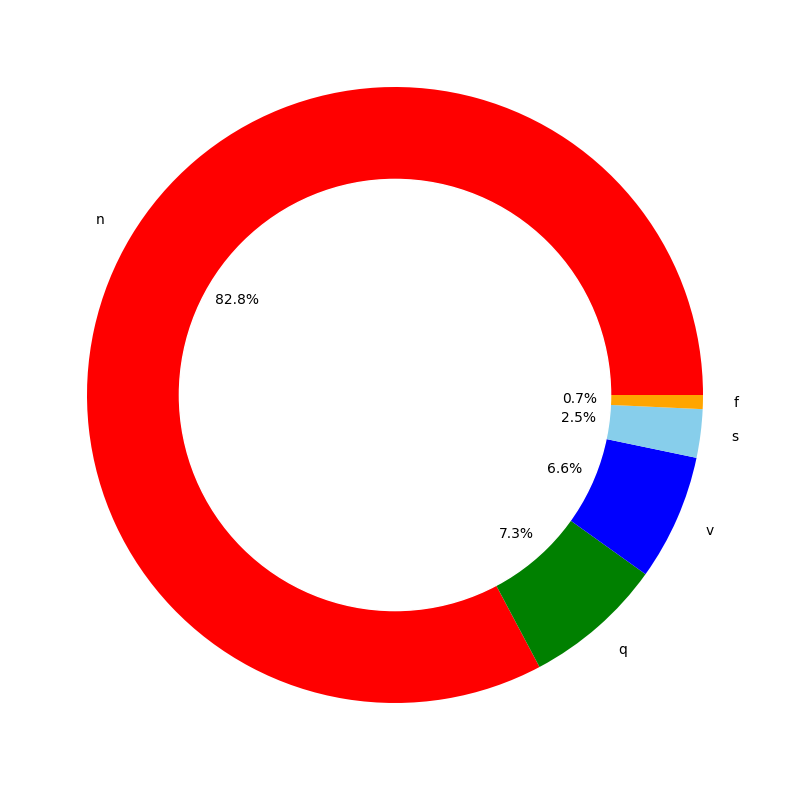

In [11]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [12]:
#select number of trainsing samples to use
Ns = equilibre[0]
print(Ns)

72471


In [13]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=Ns,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=Ns,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=Ns,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=Ns,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=Ns,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [14]:
equilibre=train_df[187].value_counts()
print(equilibre)

187
0    72471
1    72471
2    72471
3    72471
4    72471
Name: count, dtype: int64


In [15]:
df_0.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
10153,0.162791,0.540698,0.755814,0.186047,0.168605,0.546512,0.616279,0.697674,0.651163,0.703488,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
33886,0.990066,0.938742,0.344371,0.034768,0.273179,0.331126,0.326159,0.341060,0.347682,0.347682,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
32005,0.974239,0.932084,0.590164,0.131148,0.014052,0.168618,0.238876,0.210773,0.196721,0.208431,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
56159,0.978495,0.723118,0.526882,0.298387,0.220430,0.158602,0.091398,0.091398,0.080645,0.083333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
61783,0.963351,0.709424,0.060209,0.013089,0.057592,0.041885,0.047120,0.034031,0.039267,0.044503,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [16]:
df_1.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
72471,1.000000,0.666667,0.100457,0.036530,0.073059,0.050228,0.018265,0.105023,0.132420,0.091324,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1
72472,0.983696,1.000000,0.331522,0.000000,0.108696,0.163043,0.130435,0.190217,0.288043,0.222826,...,0.461957,0.483696,0.500000,0.494565,0.510870,0.51087,0.505435,0.472826,0.434783,1
72473,1.000000,0.911504,0.216814,0.000000,0.101770,0.199115,0.176991,0.194690,0.252212,0.238938,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1
72474,0.090498,0.126697,0.217195,0.361991,0.461538,0.556561,0.443439,0.434389,0.452489,0.511312,...,0.122172,0.131222,0.140271,0.158371,0.176471,0.20362,0.212670,0.000000,0.000000,1
72475,0.961111,1.000000,0.551852,0.101852,0.040741,0.085185,0.094444,0.088889,0.085185,0.070370,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1


In [17]:
df_1_upsample.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
73817,1.000000,0.622642,0.196226,0.316981,0.324528,0.316981,0.328302,0.339623,0.332075,0.343396,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
73593,1.000000,0.964286,0.185714,0.000000,0.114286,0.064286,0.114286,0.128571,0.271429,0.214286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
74237,0.863980,0.748111,0.168766,0.000000,0.105793,0.219144,0.221662,0.229219,0.239295,0.256927,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
74625,0.897436,0.851282,0.200000,0.000000,0.117949,0.179487,0.087179,0.143590,0.205128,0.138462,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
73618,1.000000,0.672289,0.000000,0.004819,0.154217,0.168675,0.146988,0.115663,0.098795,0.091566,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


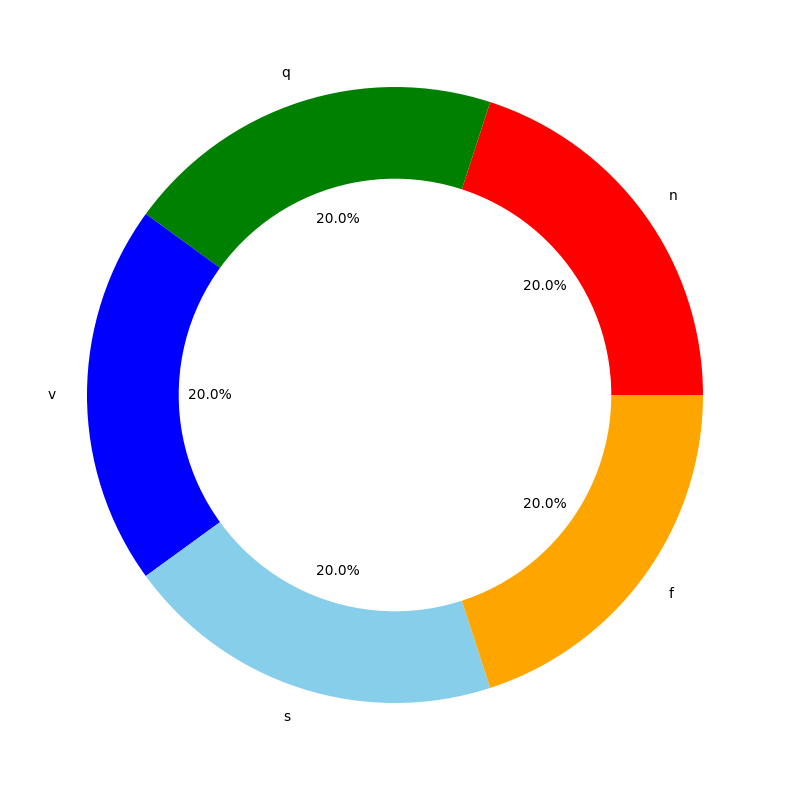

In [18]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [19]:
c=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))

In [20]:
c

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
31819,0.896135,0.855072,0.241546,0.000000,0.159420,0.246377,0.285024,0.306763,0.294686,0.299517,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
73666,1.000000,0.820755,0.183962,0.000000,0.094340,0.150943,0.122642,0.160377,0.231132,0.198113,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
79443,0.832936,0.797136,0.520286,0.133652,0.000000,0.097852,0.195704,0.257757,0.250597,0.262530,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
80504,0.988930,1.000000,0.575646,0.291513,0.186347,0.149446,0.138376,0.110701,0.107011,0.095941,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
84948,1.000000,0.462810,0.450413,0.479339,0.504132,0.454545,0.462810,0.433884,0.413223,0.309917,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


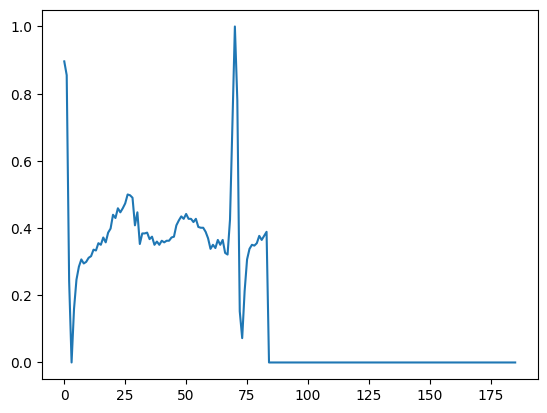

In [21]:
 plt.plot(c.iloc[0,:186])

In [22]:
def plot_hist(class_number,size,min_,bins):
    img=train_df.loc[train_df[187]==class_number].values
    img=img[:,min_:size]
    img_flatten=img.flatten()

    final1=np.arange(min_,size)
    for i in range (img.shape[0]-1):
        tempo1=np.arange(min_,size)
        final1=np.concatenate((final1, tempo1), axis=None)
    print(len(final1))
    print(len(img_flatten))
    plt.hist2d(final1,img_flatten, bins=(bins,bins),cmap=plt.cm.jet)
    plt.show()

In [ ]:
plot_hist(0,70,5,65)

In [ ]:
 plt.plot(c.iloc[1,:186])

In [ ]:
plot_hist(1,50,5,45)

In [ ]:
 plt.plot(c.iloc[2,:186])

In [ ]:
plot_hist(2,50,5,45)

In [ ]:
plt.plot(c.iloc[3,:186])

In [ ]:
plot_hist(3,60,15,45)

In [ ]:
plt.plot(c.iloc[4,:186])

In [ ]:
plot_hist(4,50,15,35)